In [2]:
import glob
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from scipy import stats
import numpy as np


# C8 Lapse Rate

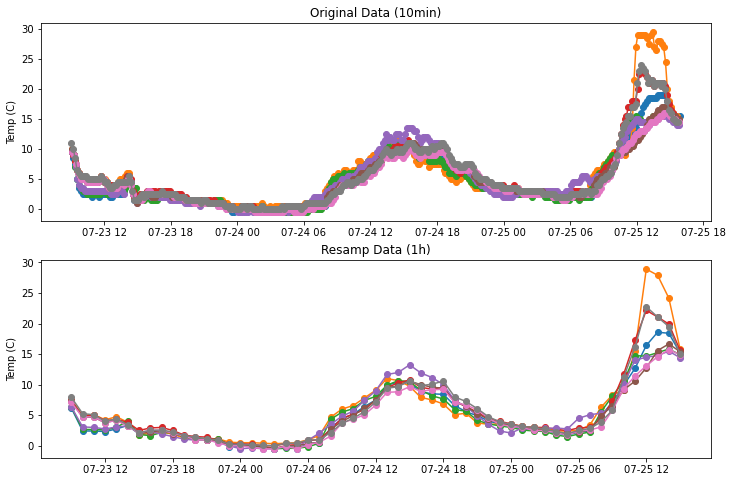

In [3]:

#path = '/Users/mira/Documents/UW/JIRP/DATA/iButtons/TESTS/'
path = '/Users/scamp/Desktop/iButtons/DATA/C8/'

files = glob.glob(path+'*.csv')


fig, axs = plt.subplots(2, 1, figsize= (12,8))

###############################
#read and plot the data, original and resampled (choose the interval and take the mean over that interval here)
###############################



for ii, file in enumerate(files[0:]):
    
    df = pd.read_csv(file, header=13, encoding='cp1252', index_col=0,
                     names=['Unit'+str(ii+1), 'Value'])
    df.index = pd.to_datetime(df.index, format='%m/%d/%y %I:%M:%S %p')
    
    df_resamp = df.resample('1h').mean()  # set the interval i want to resample and mean
    
    axs[0].plot(df.Value,'o-')
    axs[0].set_title('Original Data (10min)',)
    axs[0].set_ylabel('Temp (C)')
    
    axs[1].plot(df_resamp, 'o-')
    axs[1].set_title('Resamp Data (1h)')
    axs[1].set_ylabel('Temp (C)')
    
    
    

the samples need the right time selection"

# Lapse Rate: C8

## Put in the right height of the samples 
## Trunctate to the right time interval


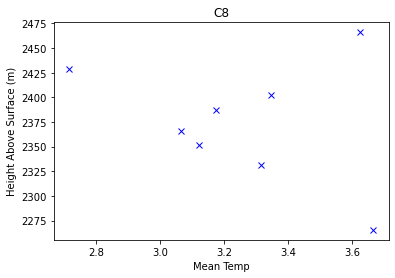

In [4]:
path = '/Users/scamp/Desktop/iButtons/DATA/C8/'

files = glob.glob(path+'*.csv')   

#Lapse Rate Calculation
# enter the elevations that correspond in order that "files" variable shows in the console below
# Vertical profile reads them in as AA, RR< SS, FF, II, JJ, DD< KK, QQ< CC

fig, ax = plt.subplots(1,1)

hgt_C8 = np.array([2366.1, 2265.48, 2331.6, 2402.6, 2466.0, 2351.8, 2428.7, 2387.3])# enter the elevations in order of how the data is read in. 
dmean_temp_C8 = np.zeros(hgt_C8.size)
#time taken from 1700 to 1700 for full 24h circle
starttime = '2023-07-23 17:00:00'  #deployment times
endtime = '2023-07-24 17:00:00'   #end time of deployment: choose this to be one full circle of 24h



for ii, file in enumerate(files[0:]):
    
    df = pd.read_csv(file, header=13, encoding='cp1252', index_col=0,
                     names=['Unit'+str(ii+1), 'Value'])
    df.index = pd.to_datetime(df.index, format='%m/%d/%y %I:%M:%S %p')
    
    df_sliced = df[slice(starttime, endtime)] #select 24h slice

    df_resamp = df_sliced.resample('1H').mean()  # set the interval i want to resample and mean
    
    dmean_temp_C8[ii]= df_resamp.mean()

    
    
    ax.plot(df_resamp.mean(), hgt_C8[ii] , 'x', color = 'b')  # this takes the mean of the entire time series and plots the elevation vs temp 
    ax.set_title('C8')
    ax.set_xlabel('Mean Temp')
    ax.set_ylabel('Height Above Surface (m)')


In [5]:
slope, intercept, rvalue = stats.linregress(hgt_C8,dmean_temp_C8)[:3]
print(slope*1000)
print(rvalue)

-1.3819223458570984
-0.27520244474219746


# C18 to C8 Traverse

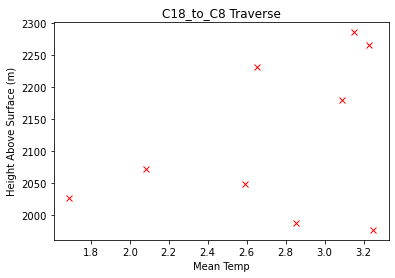

In [118]:
path = '/Users/scamp/Desktop/iButtons/DATA/C18_to_C8/'

files = glob.glob(path+'*.csv')   

#Lapse Rate Calculation
# enter the elevations that correspond in order that "files" variable shows in the console below
# Vertical profile reads them in as AA, RR< SS, FF, II, JJ, DD< KK, QQ< CC

fig, ax = plt.subplots(1,1)

hgt_trav = np.array([2285.3, 2231.3, 2048.0, 1986.7,2026.8, 2071.3,1976.6, 2180.2, 2265.6 ])# enter the elevations in order of how the data is read in. 
dmean_temp_trav = np.zeros(hgt_trav.size)
#time taken from 1700 to 1700 for full 24h circle
starttime = '2023-07-23 17:00:00'  #deployment times
endtime = '2023-07-24 17:00:00'   #end time of deployment: choose this to be one full circle of 24h



for ii, file in enumerate(files[0:]):
    
    df = pd.read_csv(file, header=13, encoding='cp1252', index_col=0,
                     names=['Unit'+str(ii+1), 'Value'])
    df.index = pd.to_datetime(df.index, format='%m/%d/%y %I:%M:%S %p')
    
    df_sliced = df[slice(starttime, endtime)] #select 24h slice

    df_resamp = df_sliced.resample('1H').mean()  # set the interval i want to resample and mean
    
    dmean_temp_trav[ii]= df_resamp.mean()

    
    
    ax.plot(df_resamp.mean(), hgt_trav[ii] , 'x', color = 'r')  # this takes the mean of the entire time series and plots the elevation vs temp 
    ax.set_title('C18_to_C8 Traverse')
    ax.set_xlabel('Mean Temp')
    ax.set_ylabel('Height Above Surface (m)')


In [119]:
slope, intercept, rvalue = stats.linregress(hgt_trav,dmean_temp_trav)[:3]
print(slope*1000)
print(rvalue)

1.6977397733443564
0.3807761011948203


# Heather Camp

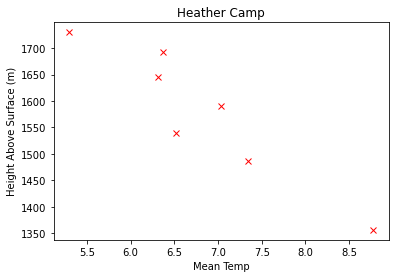

In [71]:
path = '/Users/scamp/Desktop/iButtons/DATA/Heather/'

files = glob.glob(path+'*.csv')   

#Lapse Rate Calculation
# enter the elevations that correspond in order that "files" variable shows in the console below
# Vertical profile reads them in as AA, RR< SS, FF, II, JJ, DD< KK, QQ< CC

fig, ax = plt.subplots(1,1)

hgt_heath = np.array([1539,1693,1730, 1645, 1487, 1590, 1356 ])# enter the elevations in order of how the data is read in. 
dmean_temp_heath = np.zeros(hgt_heath.size)
dhour_temp_heath = np.zeros((hgt_heath.size,48))
#time taken from 1700 to 1700 for full 24h circle
starttime = '2023/07/17 17:00'  #deployment times
endtime = '2023/07/19 17:00'   #end time of deployment: choose this to be one full circle of 24h



for ii, file in enumerate(files[0:]):
    
    df = pd.read_csv(file, header=13, encoding='cp1252', index_col=0,
                     names=['Unit'+str(ii+1), 'Value'])
    df.index = pd.to_datetime(df.index, format='%m/%d/%y %I:%M:%S %p')
    
    df_sliced = df[slice(starttime, endtime)] #select 48h slice

    df_resamp = df_sliced.resample('1H').mean()  # set the interval i want to resample and mean
    #dhour_temp_heath[ii] = df_resamp
    
    
    dmean_temp_heath[ii]= df_resamp.mean()

    
    
    ax.plot(df_resamp.mean(), hgt_heath[ii] , 'x', color = 'r')  # this takes the mean of the entire time series and plots the elevation vs temp 
    ax.set_title('Heather Camp')
    ax.set_xlabel('Mean Temp')
    ax.set_ylabel('Height Above Surface (m)')


In [8]:
slope, intercept, rvalue = stats.linregress(hgt_heath,dmean_temp_heath)[:3]
print(slope*1000)
print(rvalue)

-7.852960166407465
-0.937258475768685


# C9


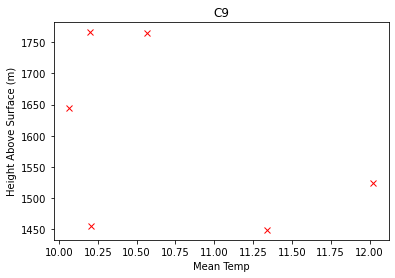

In [22]:
path = '/Users/scamp/Desktop/iButtons/DATA/Dan_C9/'

files = glob.glob(path+'*.csv')   

#Lapse Rate Calculation
# enter the elevations that correspond in order that "files" variable shows in the console below
# Vertical profile reads them in as AA, RR< SS, FF, II, JJ, DD< KK, QQ< CC

fig, ax = plt.subplots(1,1)

hgt_C9 = np.array([ 1525, 1764, 1766, 1449, 1456, 1644 ])# enter the elevations in order of how the data is read in. 
dmean_temp_C9 = np.zeros(hgt_C9.size)
#time taken from 1700 to 1700 for full 24h circle
starttime = '2023-07-14 17:00'  #deployment times
endtime = '2023-07-15 17:00'   #end time of deployment: choose this to be one full circle of 24h



for ii, file in enumerate(files[0:]):
    
    df = pd.read_csv(file, header=13, encoding='cp1252', index_col=0,
                     names=['Unit'+str(ii+1), 'Value'])
    df.index = pd.to_datetime(df.index, format='%m/%d/%y %I:%M:%S %p')
    
    df_sliced = df[slice(starttime, endtime)] #select 24h slice

    df_resamp = df_sliced.resample('1H').mean()  # set the interval i want to resample and mean
    
    dmean_temp_C9[ii]= df_resamp.mean()

    
    
    ax.plot(df_resamp.mean(), hgt_C9[ii] , 'x', color = 'r')  # this takes the mean of the entire time series and plots the elevation vs temp 
    ax.set_title('C9')
    ax.set_xlabel('Mean Temp')
    ax.set_ylabel('Height Above Surface (m)')


In [120]:
slope, intercept, rvalue = stats.linregress(hgt_C9,dmean_temp_C9)[:3]
print(slope*1000)
print(rvalue)

-2.440692310067662
-0.4520576117635627


In [79]:
slope_r, intercept_r, rvalue_r = stats.linregress(
    np.concatenate([dmean_temp_heath,dmean_temp_C8]),
    np.concatenate([hgt_heath,hgt_C8]) )[:3]


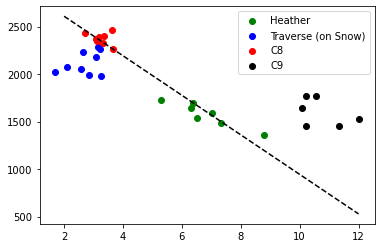

In [24]:
plt.scatter( dmean_temp_heath, hgt_heath, c = 'g', label = 'Heather')
plt.scatter( dmean_temp_trav, hgt_trav, c = 'b', label = 'Traverse (on Snow)')
plt.scatter( dmean_temp_C8, hgt_C8, color = 'r', label = 'C8')
plt.scatter( dmean_temp_C9, hgt_C9, color = 'k', label = 'C9')
plt.plot(np.linspace(2,12), intercept+slope*np.linspace(2,12), c = 'k', linestyle='dashed')
plt.legend()

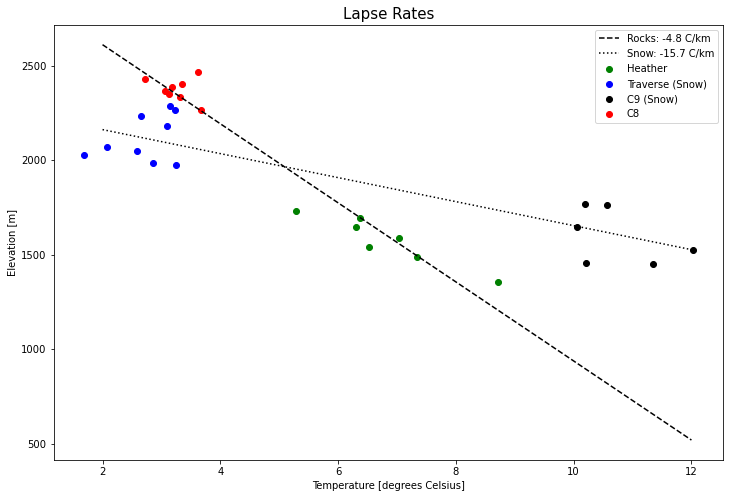

In [162]:
fig, ax = plt.subplots(1,1, figsize = (12,8))

ax.scatter( dmean_temp_heath, hgt_heath, c = 'g', label = 'Heather')
ax.scatter( dmean_temp_trav, hgt_trav, c = 'b', label = 'Traverse (Snow)')
ax.scatter( dmean_temp_C9, hgt_C9, color = 'k', label = 'C9 (Snow)')
ax.scatter( dmean_temp_C8, hgt_C8, color = 'r', label = 'C8')


ax.plot(np.linspace(2,12), intercept_r+slope_r*np.linspace(2,12), c = 'k', linestyle='dashed', label = 'Rocks: {} C/km'.format(round(1/slope_r*1000,1)))
ax.plot(np.linspace(2,12), intercept_s+slope_s*np.linspace(2,12), c = 'k', linestyle='dotted', label = 'Snow: {} C/km'.format(round(1/slope_s*1000,1)))


ax.set_xlabel('Temperature [degrees Celsius]')
ax.set_ylabel('Elevation [m]')
ax.set_title('Lapse Rates', fontsize = 15)
plt.legend()
plt.savefig('LapseRates.png')

In [107]:
print('Lapse Rate: ', 1000/slope_r)
print('Rsquared = ', rvalue_r**2)

Lapse Rate:  -4.779485923742817
Rsquared =  0.9496571000594891


In [117]:
print('Lapse Rate: ', 1000/slope_s)
print('Rsquared = ', rvalue_s**2)

Lapse Rate:  -15.74127475474359
Rsquared =  0.7987336003990616


In [85]:
slope_s, intercept_s, rvalue_s = stats.linregress(
    np.concatenate([dmean_temp_trav,dmean_temp_C9]),
    np.concatenate([hgt_trav,hgt_C9]) )[:3]


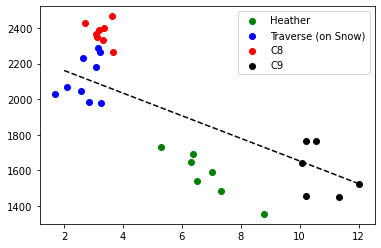

In [27]:
plt.scatter( dmean_temp_heath, hgt_heath, c = 'g', label = 'Heather')
plt.scatter( dmean_temp_trav, hgt_trav, c = 'b', label = 'Traverse (on Snow)')
plt.scatter( dmean_temp_C8, hgt_C8, color = 'r', label = 'C8')
plt.scatter( dmean_temp_C9, hgt_C9, color = 'k', label = 'C9')
plt.plot(np.linspace(2,12), intercept+slope*np.linspace(2,12), c = 'k', linestyle='dashed')
plt.legend()

In [28]:
print('Lapse Rate: ', 1000/slope)
print('Rsquared = ', rvalue**2)

Lapse Rate:  -15.74127475474359
Rsquared =  0.7987336003990616


# Time Variability
Using Heather Camp Data


In [167]:
path = '/Users/scamp/Desktop/iButtons/DATA/Heather/'

files = glob.glob(path+'*.csv')   

#Lapse Rate Calculation
# enter the elevations that correspond in order that "files" variable shows in the console below
# Vertical profile reads them in as AA, RR< SS, FF, II, JJ, DD< KK, QQ< CC


hgt_heath = np.array([1539,1693,1730, 1645, 1487, 1590, 1356 ])# enter the elevations in order of how the data is read in. 
dmean_temp_heath = np.zeros(hgt_heath.size)
hmean_temp_heath = np.zeros((hgt_heath.size,48))
#time taken from 1700 to 1700 for full 24h circle
starttime = '2023/07/17 17:00'  #deployment times
endtime = '2023/07/19 16:59'   #end time of deployment: choose this to be one full circle of 24h



for ii, file in enumerate(files[0:]):
    
    df = pd.read_csv(file, header=13, encoding='cp1252', index_col=0,
                     names=['Unit'+str(ii+1), 'Value'])
    df.index = pd.to_datetime(df.index, format='%m/%d/%y %I:%M:%S %p')
    
    df_sliced = df[slice(starttime, endtime)] #select 48h slice

    df_resamp = df_sliced.resample('1H').mean()  # set the interval i want to resample and mean
    hmean_temp_heath[ii] = df_resamp.values.reshape((48,))
    
    
    dmean_temp_heath[ii]= df_resamp.mean()

    
    

In [168]:
slopes = np.zeros(hmean_temp_heath.shape[1])
intercepts = np.zeros(hmean_temp_heath.shape[1])
rvalues = np.zeros(hmean_temp_heath.shape[1])

for i, hmeans in enumerate(hmean_temp_heath.T):

    slopes[i], intercepts[i], rvalues[i] = stats.linregress(hgt_heath,hmeans )[:3]


Text(0.5, 1.0, 'Heather Camp Diurnal Variability')

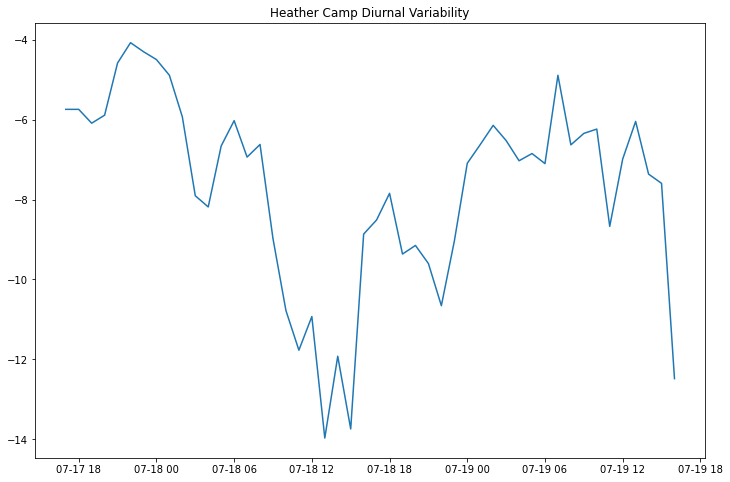

In [169]:
plt.figure(figsize=(12,8))
plt.plot(df_resamp.index, (slopes*1000))
plt.title('Heather Camp Diurnal Variability')

Text(0.5, 1.0, 'Heather Camp Diurnal Variability')

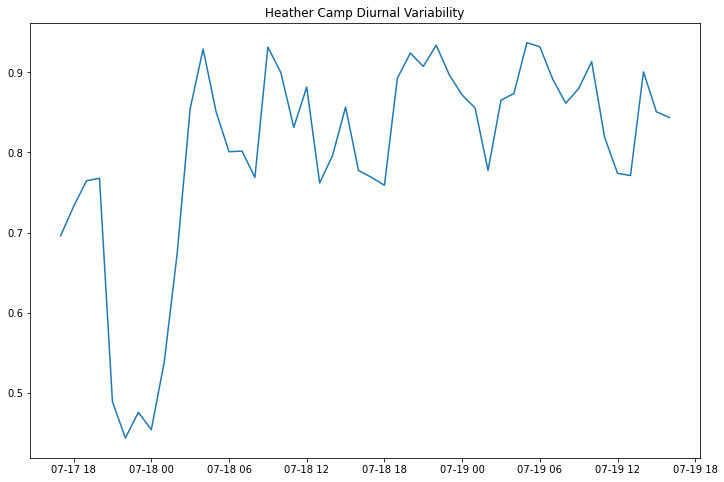

In [170]:
plt.figure(figsize=(12,8))
plt.plot(df_resamp.index, (rvalues)**2)
plt.title('Heather Camp Diurnal Variability')

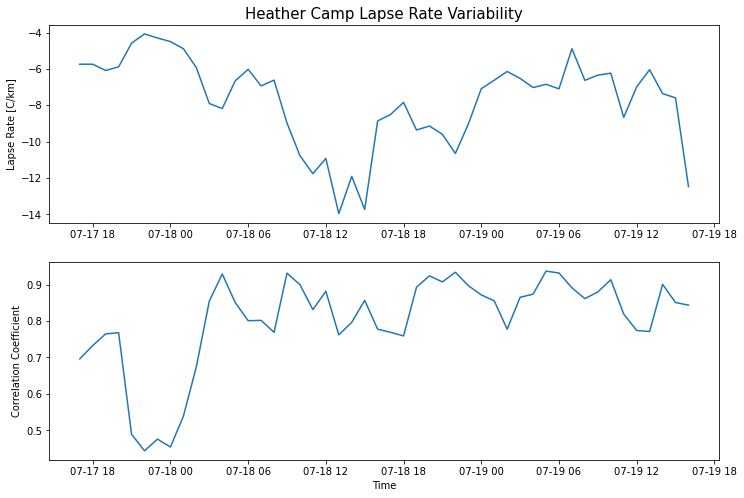

In [181]:
fig, (ax1, ax2) = plt.subplots(2,1, figsize = (12,8))\

ax1.plot(df_resamp.index, (slopes*1000))
ax2.plot(df_resamp.index, (rvalues)**2)

ax1.set_ylabel('Lapse Rate [C/km]')
ax2.set_ylabel('Correlation Coefficient')
ax2.set_xlabel('Time')

ax1.set_title('Heather Camp Lapse Rate Variability', fontsize = 15);

plt.savefig('Variability.png')


In [105]:
df_sliced.resample('3H').shape

AttributeError: 'DatetimeIndexResampler' object has no attribute 'shape'

# C18_Vertical Data
Profile of temperature up to 2m above the surface.

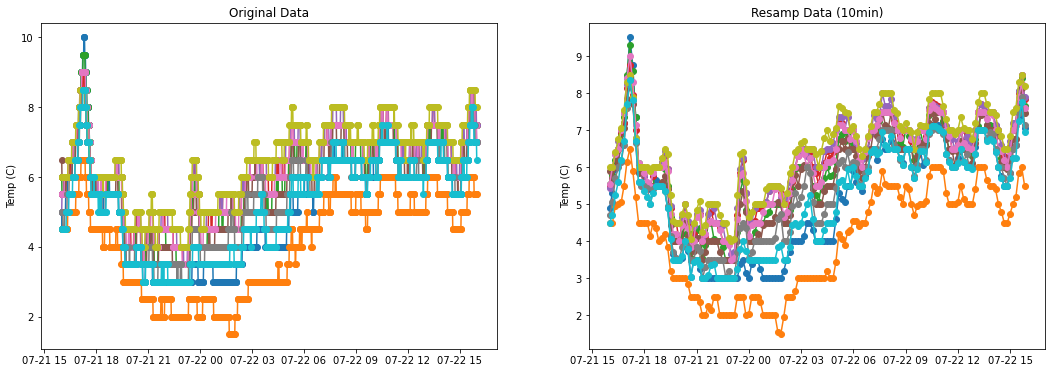

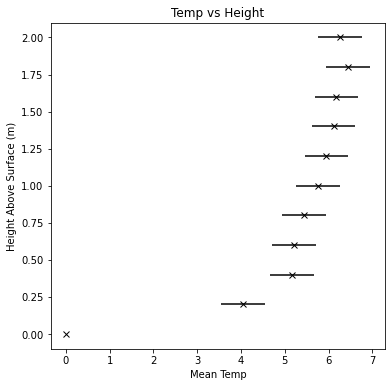

In [137]:



#path = '/Users/mira/Documents/UW/JIRP/DATA/iButtons/TESTS/'
path = '/Users/scamp/Desktop/iButtons/DATA/C18_Vert/'

files = glob.glob(path+'*.csv')


fig, (ax0, ax1) = plt.subplots(nrows = 1, ncols = 2, figsize=(18,6))

###############################
#read and plot the data, original and resampled (choose the interval and take the mean over that interval here)
###############################

# enter the elevations that correspond in order that "files" variable shows in the console below
# Vertical profile reads them in as AA, RR< SS, FF, II, JJ, DD< KK, QQ< CC

hgt = [0.4, 0.2, 1.2, 1.6, 2, 1, 1.4, 0.8, 1.8,0.6]  # enter the elevations in order of how the data is read in. 
temp_hgt = np.zeros(len(hgt))
starttime = '2023/07/21 16:00'  #deployment times
endtime = '2023/07/22 15:59'   #end time of deployment: choose this to be one full circle of 24h

for ii, file in enumerate(files[0:]):
    
    df = pd.read_csv(file, header=13, encoding='cp1252', index_col=0,
                     names=['Unit'+str(ii+1), 'Value'])
    df.index = pd.to_datetime(df.index, format='%m/%d/%y %I:%M:%S %p')
    
    df_sliced = df[slice(starttime, endtime)] #select 48h slice

    
    df_resamp = df_sliced.resample('10Min').mean()  # set the interval i want to resample and mean
    
    ax0.plot(df_sliced.Value,'o-')
    ax0.set_title('Original Data')
    ax0.set_ylabel('Temp (C)')
    
    ax1.plot(df_resamp, 'o-')
    ax1.set_title('Resamp Data (10min)')
    ax1.set_ylabel('Temp (C)')


fig, (ax0) = plt.subplots(nrows = 1, ncols = 1, figsize=(6,6))

# save the mean temps
# 
ax0.plot(0,0,'x', color = 'k')
for ii, file in enumerate(files[0:]):
    df = pd.read_csv(file, header=13, encoding='cp1252', index_col=0,
                     names=['Unit'+str(ii+1), 'Value'])
    df.index = pd.to_datetime(df.index, format='%m/%d/%y %I:%M:%S %p')
    df_sliced = df[slice(starttime, endtime)] #select 48h slice
    temp_hgt[ii] = df_sliced.mean()

    #df_resamp = df.resample('60Min').mean()  # set the interval i want to resample and mean
    #df_resamp = df_sliced.resample('24H').mean()  # set the interval i want to resample and mean

    ax0.errorbar(df_sliced.mean(), hgt[ii], xerr=0.5, marker = 'x', linestyle = '-', color = 'k' )  # this takes the mean of the entire time series and plots the elevation vs temp 
    ax0.set_title('Temp vs Height')
    ax0.set_xlabel('Mean Temp')
    ax0.set_ylabel('Height Above Surface (m)')
    


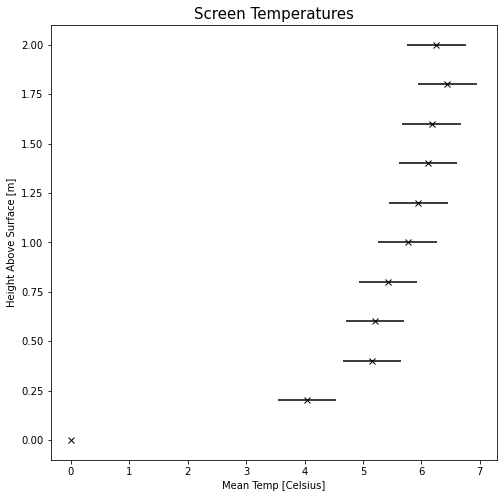

In [161]:
fig, ax0 = plt.subplots(1,1, figsize= (8,8))

ax0.plot(0,0, c='k', marker='x')
ax0.errorbar(temp_hgt, hgt, xerr=0.5, marker = 'x', linestyle = '', color = 'k' )  # this takes the mean of the entire time series and plots the elevation vs temp 
ax0.set_title('Screen Temperatures', fontsize=15)
ax0.set_xlabel('Mean Temp [Celsius]')
ax0.set_ylabel('Height Above Surface [m]')
plt.savefig('ScreenTemp.png')

In [143]:
len(temp_hgt)

10

# Errors


In [47]:
path = '/Users/scamp/Desktop/iButtons/DATA/Errors/'

files = glob.glob(path+'*.csv')   

#Lapse Rate Calculation
# enter the elevations that correspond in order that "files" variable shows in the console below
# Vertical profile reads them in as AA, RR< SS, FF, II, JJ, DD< KK, QQ< CC


starttime = '2023-07-23 17:00'  #deployment times
endtime = '2023-07-24 16:59'   #end time of deployment: choose this to be one full circle of 24h

temp_sens = np.zeros((2,24*6))

for ii, file in enumerate(files[0:]):
    
    df = pd.read_csv(file, header=13, encoding='cp1252', index_col=0,
                     names=['Unit'+str(ii+1), 'Value'])
    df.index = pd.to_datetime(df.index, format='%m/%d/%y %I:%M:%S %p')
    
    df_sliced = df[slice(starttime, endtime)] #select 24h slice

    df_resamp = df_sliced.resample('10min').mean().values[:,0] # set the interval i want to resample and mean
    
    temp_sens[ii] = df_resamp

   

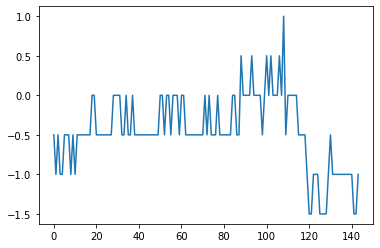

In [52]:
plt.plot(temp_sens[0]-temp_sens[1])

In [55]:
np.std(temp_sens[0]-temp_sens[1])

0.4583201807877152

In [108]:
np.mean(temp_sens[0]-temp_sens[1])

-0.4409722222222222